### Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод.

In [2]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    return W

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [4]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [5]:
X_st = X.copy().astype(np.float64)

for i in range(1,len(X_st)):
    X_st[i] = calc_std_feat(X_st[i])

X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [6]:
lambdas = np.linspace(1e-4, 10, 100)

w_1 = []
w_2 = []
w_3 = []

for l in lambdas:
    w = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=l)
    w_1.append(w[1])
    w_2.append(w[2])
    w_3.append(w[3])

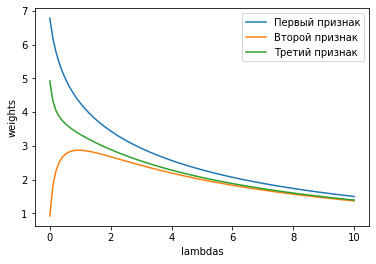

In [7]:
plt.xlabel("lambdas")
plt.ylabel("weights")

plt.plot(lambdas, w_1, label = "Первый признак")
plt.plot(lambdas, w_2, label = "Второй признак")
plt.plot(lambdas, w_3, label = "Третий признак")
plt.legend(loc="upper right")

#### Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [8]:
def eval_model_reg(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_/2 * np.abs(W))
        # print(f'Iteration: {i}, Weights: {W}, MSE: {err}')
    return W

In [9]:
lambdas = np.linspace(1e-4, 5, 10)

w_1 = []
w_2 = []
w_3 = []

for l in lambdas:
    w = eval_model_reg(X_st, y, iterations=7777, alpha=1e-2, lambda_=l)
    w_1.append(w[1])
    w_2.append(w[2])
    w_3.append(w[3])

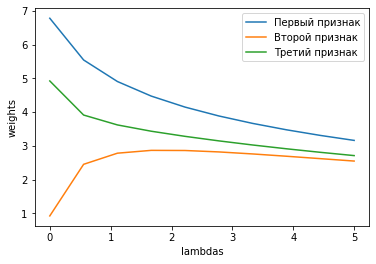

In [10]:
plt.xlabel("lambdas")
plt.ylabel("weights")

plt.plot(lambdas, w_1, label = "Первый признак")
plt.plot(lambdas, w_2, label = "Второй признак")
plt.plot(lambdas, w_3, label = "Третий признак")
plt.legend(loc="upper right")

#### Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Применение возможно, но в зависимости от того, какой метод масштабирования мы применим последним, таким и будет результат, т.е. нормализированным или стандартизированным.